# Lecture 14: Crash Course in Probability

CSCI 1360E: Foundations for Informatics and Analytics

## Overview and Objectives

To wrap up the fundamental concepts of core data science, as well as our interlude from Python, today we'll discuss probability and how it relates to statistical inference. Like with statistics, we'll wave our hands a lot and skip past many of the technicalities, so I encourage you to take a full course in probability and statistics. By the end of this lecture, you should be able to

 - Define probability and its relationship to statistics
 - Understand statistical dependence and independence
 - Explain conditional probability and its role in Bayes' Theorem

## Part 1: Probability

When we say "what is the probability of X", we're discussing a way of quantifying uncertainty.

This uncertainty relates to *one particular event*--in the above statement, that event is "X"--happening out of a *universe of all possible events*.

An easy example is rolling a die: the universe consists of all possible outcomes (any of the 6 sides), whereas any subset is a single event (one side; an even number; etc).

### Relationship with Statistics

Think of "probability" and "statistics" as two sides of the same coin: you cannot have one without the other.

![probstats](Lecture14/slide_3.jpg)

Let's go back to the concept of distributions from the Statistics lecture. Remember this figure?

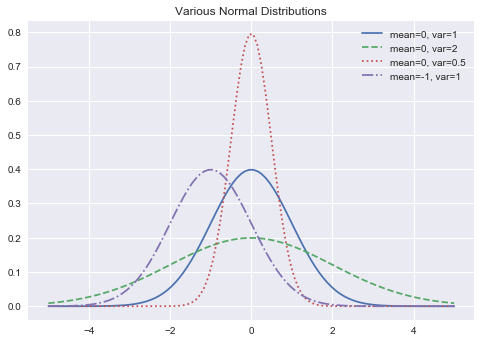

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
xs = np.linspace(-5, 5, 100)
plt.plot(xs, norm.pdf(xs, loc = 0, scale = 1), '-', label = "mean=0, var=1")
plt.plot(xs, norm.pdf(xs, loc = 0, scale = 2), '--', label = "mean=0, var=2")
plt.plot(xs, norm.pdf(xs, loc = 0, scale = 0.5), ':', label = "mean=0, var=0.5")
plt.plot(xs, norm.pdf(xs, loc = -1, scale = 1), '-.', label = "mean=-1, var=1")
plt.legend(loc = 0)
plt.title("Various Normal Distributions")

These distributions allow us to say something about the *probability* of a random variable taking a certain specific value.

In fact, if you look at the previous plot of the normal bell curves--picking a spot along one of those curves gives you the probability of the random variable representing that distribution taking on that particular value you picked!

I hope it becomes clear that, the *most likely* value for a random variable to take is its mean. This even has a special name: the **expected value**. It means, on average, this is the value we're going to get from this random variable.

We have a special notation for probability:

$P(X = x)$

$P$ is the universal symbol for "probability of", followed by some *event*. In this case, our event is "$X = x$".

(Recall from before: *random variables* are denoted with uppercase letters (e.g. $X$), and *observations* of that random variable are denoted with lowercase letters (e.g. $x$). So when we say $X = x$, we're asking for the *event* where the random variable takes on the value of the observation.)

A few other properties to be aware of:

 - Probabilities are *always* between 0 and 1; no exceptions. This means, for any arbitrary event $A$, $0 \le P(A) \le 1$.

 - The probability of *something* happening is always exactly 1. Put another way, if you combine all possible events together and ask the probability of one of them occurring, that probability is 1.

 - If $A$ and $B$ are two possible events that disparate (as in, they have no overlap), then the probability of either one of them happening is just the sum of their individual probabilities: $P(A, B) = P(A) + P(B)$.

These three points are referred to as the **Axioms of Probability** and form the foundation for pretty much every other rule of probability that has ever been and will ever be discovered.

### Visualizing

A good way of learning probability is to visualize it. Take this spinner:

![spinner](Lecture14/spinner1.jpg)

It's split into 12 segments. You could consider each segment to be one particular "event", and that event is true if, when you spin it, the spinner stops on that segment. So the probability of landing on any one specific segment is $1/12$. The probability of landing on *any segment at all* is 1.

### Dependence and Independence

Two events $A$ and $B$ are **dependent** if having knowledge about *one* of them implicitly gives you knowledge about the other. On the other hand, they're **independent** if knowing one tells you nothing about the other. Take an example of flipping a coin:

I have a penny; a regular old penny. I flip it once, and it lands on *Heads*. I flip it 9 more times, and it lands on *Heads* each time. What is the probability that the next flip will be *Heads*?

If you said $1/2$, you're correct! Coin flips are **independent** events; you could flip the coin 100 times and get 100 heads, and the probability of tails would *still* be $1/2$. Knowing one coin flip or 100 coin flips tells you nothing about future coin flips.

Now, I want to know what the probability is of *two consecutive coin flips* returning Heads. If the first flip is Heads, what is the probability of both flips being Heads? What if the first flip is Tails?

In this case, the two coin flips are **dependent**. If the first flip is Tails, then it's impossible for both coin flips to be Heads. On the other hand, if the first coin flip is Heads, then while it's not certain that both coin flips can be Heads, it's still a possibility. Thus, knowing one can tell you something about the other.

If two events $A$ and $B$ are independent, their probability can be written as:

$P(A, B) = P(A) * P(B)$

This is a *huge* simplification that comes up in many data science algorithms: if you can prove two random variables in your data are statistically independent, analyzing their behavior in concert with each other becomes *much* easier.

On the other hand, if two events are dependent, then we can define the probabilities of these events in terms of their **conditional probabilities**:

$P(A, B) = P(A | B) * P(B)$

This says "the probability of $A$ and $B$ is the *conditional probability of $A$ given $B$*, multiplied by the probability of $B$."

### Conditional Probability

Conditional probability is way of "fixing" a random variable(s) we don't know, so that we can (in some sense) "solve" for the other random variable(s). So when we say:

$P(A, B) = P(A | B) * P(B)$

This tells us that, for the sake of this computation, we're assuming we *know* what $B$ is in $P(A | B)$, as knowing $B$ gives us additional information in figuring out what $A$ is (again, since $A$ and $B$ are dependent).

### Bayes' Theorem

Which brings us, at last, to Bayes' Theorem and what is probably the hardest but most important part of this entire lecture. 

(Thank *you*, Rev. Thomas Bayes)

![bayes](Lecture14/Thomas_Bayes.png)

Bayes' Theorem is a clever rearrangement of conditional probability, which allows you to update conditional probabilities as more information comes in. For two events, $A$ and $B$, Bayes' Theorem states:

$$
P(A | B) = \frac{P(B | A) * P(A)}{P(B)}
$$

As we've seen, $P(A)$ and $P(B)$ are the probabilities of those two events independent of each other, $P(B | A)$ is the probability of $B$ given that we know $A$, and $P(A | B)$ is the probability of $A$ given that we know $B$.

### Interpretation of Bayes' Theorem

Bayes' Theorem allows for an interesting interpretation of probabilistic events.

 - $P(A|B)$ is known as the *posterior* probability, which is the conditional event you're trying to compute.

 - $P(A)$ is known as the *prior* probability, which represents your current knowledge on the event $A$.

 - $P(B|A)$ is known as the *likelihood*, essentially weighting how heavily the prior knowledge you have accumulated factors into the computation of your posterior.

 - $P(B)$ is a normalizing factor--since the variable/event $A$, the thing we're determining, is not involved in this quantity, it is essentially a constant.

Given this interpretation, you could feasibly consider using Bayes' Theorem as a procedure not only to conduct inference on some system, but to simultaneously *update your understanding of the system* by incorporating new knowledge.

Here's another version of the same thing (they use the terms "hypothesis" and "evidence", rather than "event" and "data"):

![psych](Lecture14/2017222-18391340-9653-2-bayes-theorem.png)

## Review Questions

Some questions to discuss and consider:

1: Go back to the [spinner graphic](http://f.tqn.com/y/math/1/S/Q/s/spinner1.jpg). We know that the probability of landing on any *specific* segment is 1/12. What is the probability of landing on a *blue* segment? What about a *red* segment? What about a *red OR yellow* segment? What about a *red AND yellow* segment?

2: Recall the "conditional probability chain rule" from earlier in this lecture, i.e. that $P(A, B) = P(A | B) * P(B)$. Given a coin with $P(heads) = 0.75$ and $P(tails) = 0.25$, and three coin flips $A = heads$, $B = tails$, $C = heads$, compute $P(A, B, C)$.

3: Bayes' Theorem is a clever rearrangement of conditional probability using basic principles. Starting from there, $P(A, B) = P(A | B) * P(B)$, see if you can derive Bayes' Theorem for yourself.

4: Provide an example of a problem that Bayes' Theorem would be useful in solving (feel free to Google for examples), and how you would set the problem up (i.e. what values would be plugged into which variables in the equation, and why).

5: The bell curve for the normal distribution (or for *any* distribution) has a special name: the **probability distribution function**, or PDF (yep, like the file format). There's another distribution, the *uniform* distribution, that exists between two points $a$ and $b$. Given the name, what do you think its PDF from $a$ to $b$ would look like?

## Course Administrivia

 - **How is A6 going?**

 - **Next week we get back to some core Python!**

 - **Data science theory is wholly built on linear algebra, probability, and statistics.** Make sure you understand the contents of these lectures!

## Additional Resources

 1. Grus, Joel. *Data Science from Scratch*. 2015. ISBN-13: 978-1491901427
 2. Grinstead, Charles and Snell, J. Laurie. *Introduction to Probability*. [PDF](http://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/amsbook.mac.pdf)
 3. Illowsky, Barbara and Dean, Susan. *Introductory Statistics*. [link](https://openstax.org/details/introductory-statistics)
 4. Diez, David; Barr, Christopher; Cetinkaya-Rundel, Mine; *OpenIntro Statistics*. [link](https://www.openintro.org/stat/textbook.php?stat_book=os)
 5. Wasserman, Larry. *All of Statistics: A Concise Course in Statistical Inference*. 2010. ISBN-13: 978-1441923226